#### Story 4: How much do data roles get paid?

Story - 4 : How much do we get paid? 

I have introduced the term "Data Practitioner" as a generic job descriptor because we have so many different job role titles for individuals whose work activities overlap including Data Scientist, Data Engineer, Data Analyst, Business Analyst, Data Architect, etc.
For this story we will answer the question, "How much do we get paid?" Your analysis and data visualizations must address the variation in average salary based on role descriptor and state.

The data used in this notebook was scraped from Indeed in October 2023 and the code used can be found on [Github](https://github.com/jforster19/Data608/blob/main/Data608_Story4_ScrapeIndeed_jds.ipynb)

In [182]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Load in scraped job descriptions

In [2]:
input_link = 'https://raw.githubusercontent.com/jforster19/Data608/main/indeed_scraped_data_2023-10-19.csv'
df_uniq = pd.read_csv(input_link)

In [3]:
df_uniq.head()

,Unnamed: 0,job_description,link,company,salary,Employment type,search_term,location,salary_lower_range,salary_higher_range,salary_middle_range,job_title,state,is_remote
0,0,Data Scientist,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,EpochGeo,"$130,000 - $175,000 a year",Full-time,Data-Scientist,"Reston, VA 20191",130000.0,175000.0,152500.0,Data Scientist,VA,N
1,1,Data Scientist (Cleared) - Hybrid,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,ICF,"$77,890 - $132,413 a year",Full-time,Data-Scientist,"Arlington, VA 22209",77890.0,132413.0,105151.5,Data Scientist,VA,N
2,4,Global Financial Crimes - Model Governance & A...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,MUFG,"$85,000 - $105,000 a year",Full-time,Data-Scientist,"Hybrid remote in Irving, TX",85000.0,105000.0,95000.0,Business Analyst,TX,N
3,5,Data Scientist,https://www.indeed.com/rc/clk?jk=bff36fd9f50d8...,Flow,"$130,000 - $170,000 a year",Full-time,Data-Scientist,"New York, NY 10012",130000.0,170000.0,150000.0,Data Scientist,NY,N
4,9,Data Scientist,https://www.indeed.com/rc/clk?jk=c4949395d407e...,CVS Health,"$80,500 - $170,000 a year",Full-time,Data-Scientist,"New York, NY 10013",80500.0,170000.0,125250.0,Data Scientist,NY,N


#### Data Wrangling & Preparation

In [4]:
df_uniq.groupby('job_title')['link'].count().sort_values(ascending=False)

job_title
Data Engineer       85
Business Analyst    81
Data Analyst        68
Data Scientist      55
Data Architect      53
Name: link, dtype: int64

In [ ]:
def pull_number(string_val,pattern_main,remove_other_chars,return_pos):
    return float(re.sub(remove_other_chars,'',re.sub(pattern_main,f'\\{return_pos}',string_val)))

In [ ]:
def parse_salary(input_str,start):
    if re.match('.*hour.*',input_str):
        if re.match('.*-.*',input_str):
            if start:
                val = 2080 * pull_number(string_val=input_str,pattern_main='(\\$?\\d+\\.?\\d*) - (\\$?\d+\\.?\\d*) [\w\s]+',remove_other_chars='[^\\d\\.]',return_pos='1')
            else:
                val = 2080 * pull_number(string_val=input_str,pattern_main='(\\$?\\d+\\.?\\d*) - (\\$?\d+\\.?\\d*) [\w\s]+',remove_other_chars='[^\\d\\.]',return_pos='2')
            #val = 2080*float(re.sub('[^\\d\\.]','',re.sub('(\\$\\d+) - (\\$\d+) [\w\s]+','\\1',input_str)))
        else:
                val = 2080 * pull_number(string_val=input_str,pattern_main='(\\$?\\d+\\.\\d*) [\w\s]+',remove_other_chars='[^\\d\\.]',return_pos='1')
           # val = 2080*float(re.sub('[^\\d\\.]','',re.sub('(\\$\\d+) [\w\s]+','\\1',input_str)))
    elif re.match('.*month.*',input_str):
        if start:
            val = 12*pull_number(string_val=input_str,pattern_main='(\\$\d+\\,\d+) - (\\$\d+\\,\d+) [\w\s]+',remove_other_chars='[^\\d]',return_pos='1') 
        else:
            val = 12*pull_number(string_val=input_str,pattern_main='(\\$\d+\\,\d+) - (\\$\d+\\,\d+) [\w\s]+',remove_other_chars='[^\\d]',return_pos='2') 
    else:
        if re.match('.*\\-.*',input_str):
            if start:
                
                val = pull_number(string_val=input_str,pattern_main='(\\$?\d+\\,\d+\\.?\\d*) - (\\$?\d+\\,\d+\\.?\\d*) [\w\s]+',remove_other_chars='[^\\d\\.]',return_pos='1')
            else:
                val = pull_number(string_val=input_str,pattern_main='(\\$?\d+\\,\d+\\.?\\d*) - (\\$?\d+\\,\d+\\.?\\d*) [\w\s]+',remove_other_chars='[^\\d\\.]',return_pos='2')
            #val = float(re.sub('[^\\d]','',re.sub('(\\$\d+\\,\d+) - (\\$\d+\\,\d+) [\w\s]+','\\1',input_str)))
        else:
            val = pull_number(string_val=input_str,pattern_main='(\\$\d+\\,\d+\\.?\\d*) [\w\s]+',remove_other_chars='[^\\d\\.]',return_pos='1')
            #val = float(re.sub('[^\\d]','',re.sub('(\\$\d+\\,\d+) [\w\s]+','\\1',input_str)))
    return val

In [ ]:
df_uniq.loc[:,'salary_lower_range'] = df_uniq['salary'].apply(func=parse_salary,start=True)
df_uniq.loc[:,'salary_higher_range'] = df_uniq['salary'].apply(func=parse_salary,start=False)
df_uniq.loc[:,'salary_middle_range'] = (df_uniq['salary_lower_range'] + df_uniq['salary_higher_range'])/2

In [ ]:
df_uniq.groupby('job_title')['salary_middle_range'].describe()

In [ ]:
state_replace = {'Remote in Pennsylvania':'PA','Virginia':'VA','Remote in New York State':'NY',\
'Remote in Michigan':'MI','Remote in Minnesota':'MN','Arizona':'AZ','Remote in Texas':'TX','Texas':'TX','Remote in United States':'Remote','United States':'Remote','Hybrid remote':'Remote'}
df_uniq.loc[:,'state'] = df_uniq['location'].apply(lambda row: state_replace[row] if row in state_replace.keys() else re.sub('.*(\s[A-Z]{2}\s*).*','\\1',row).strip())
df_uniq.loc[:,'is_remote'] = df_uniq['state'].apply(lambda x: 'Y' if x=='Remote' else 'N')

#### Visualizations

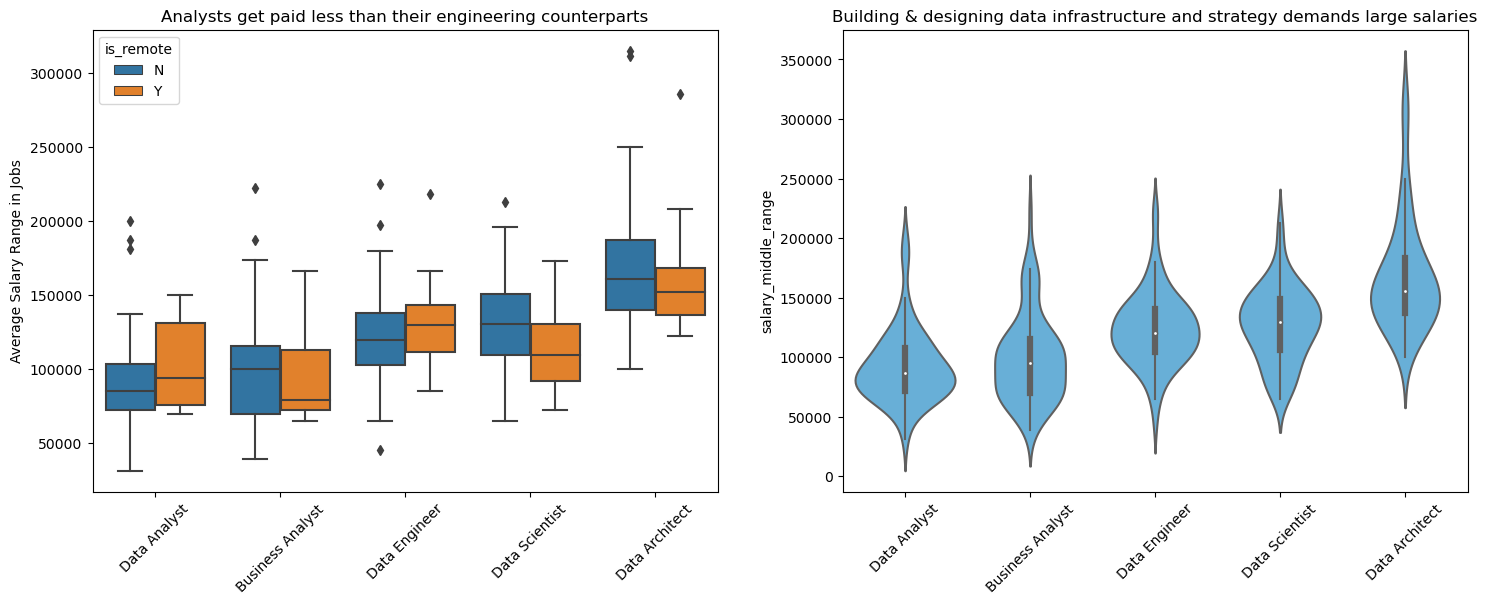

In [204]:
ordering = ['Data Analyst','Business Analyst','Data Engineer','Data Scientist','Data Architect']
fig, (ax1_dist,ax2_dist) = plt.subplots(1,2)
sns.boxplot(df_uniq,x='job_title',y='salary_middle_range',ax=ax1_dist,\
            order=ordering,hue='is_remote').set_title('Analysts get paid less than their engineering counterparts')
sns.violinplot(df_uniq,x='job_title',y='salary_middle_range',color='#56B4E9',ax=ax2_dist,\
               order=ordering).set_title('Building & designing data infrastructure and strategy demands large salaries')

plt.xticks(rotation=45)
ax1_dist.set_ylabel("Average Salary Range in Jobs")
ax1_dist.set_xlabel('')
ax2_dist.set_xlabel('')
ax1_dist.set_ylabel("Average Salary Range in Jobs")
plt.subplots_adjust(right=1.5)
ax1_dist.tick_params(axis='x',rotation=45)
ax2_dist.tick_params(axis='x',rotation=45)
plt.show();

In [33]:
plt.rcParams["figure.figsize"] = (10,6)

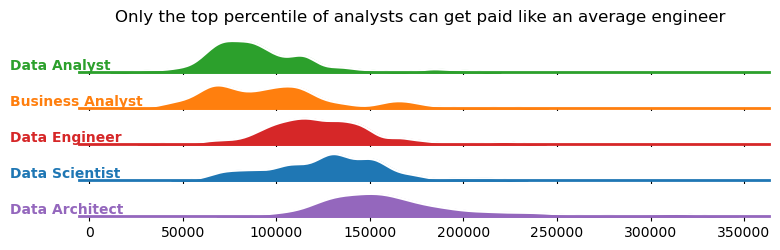

In [203]:
#https://seaborn.pydata.org/examples/kde_ridgeplot

g = sns.FacetGrid(df_uniq, row="job_title",hue='job_title',row_order=['Data Analyst','Business Analyst','Data Engineer','Data Scientist','Data Architect'], aspect=15, height=0.5) #, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "salary_middle_range",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "salary_middle_range", clip_on=False, color="w", lw=1.75, bw_adjust=.5)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(-0.1, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "job_title")

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=0.1)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)
g.fig.suptitle('Only the top percentile of analysts can get paid like an average engineer')
#title.set_text('blah')
#plt.tight_layout()
plt.xlabel('')
plt.show();

In [89]:
df_uniq['is_analyst'] = df_uniq['job_title'].apply(lambda x: 'Analyst' if x in ('Data Analyst','Business Analyst') else 'Engineer')
pivot_prep = (df_uniq.groupby(['state','is_analyst'])['salary_higher_range'].count() / df_uniq.groupby(['state'])['salary_higher_range'].count()).reset_index()

In [90]:
row_order=['Data Analyst','Business Analyst','Data Engineer','Data Scientist','Data Architect']
pivot_prep.head()

,state,is_analyst,salary_higher_range
0,AL,Engineer,1.000000
1,AZ,Engineer,1.000000
2,CA,Analyst,0.083333
3,CA,Engineer,0.916667
4,CO,Engineer,1.000000


In [156]:
pivot_df = pd.pivot(pivot_prep,index='state', columns='is_analyst',values='salary_higher_range').reset_index()
bar_order = df_uniq.groupby('state')['salary_higher_range'].mean().sort_values(ascending = False).reset_index()
bar_order['order'] = bar_order.index
bar_order.head()
pivot_df2 = pd.merge(pivot_df,bar_order,how='inner',on='state')
pivot_df2.sort_values(by='order',ascending=True).head()

,state,Analyst,Engineer,salary_higher_range,order
3,CO,NaN,1.000000,271000.000000,0
1,AZ,NaN,1.000000,234980.000000,1
11,ME,NaN,1.000000,190840.440000,2
15,NC,NaN,1.000000,184000.000000,3
2,CA,0.083333,0.916667,178558.333333,4


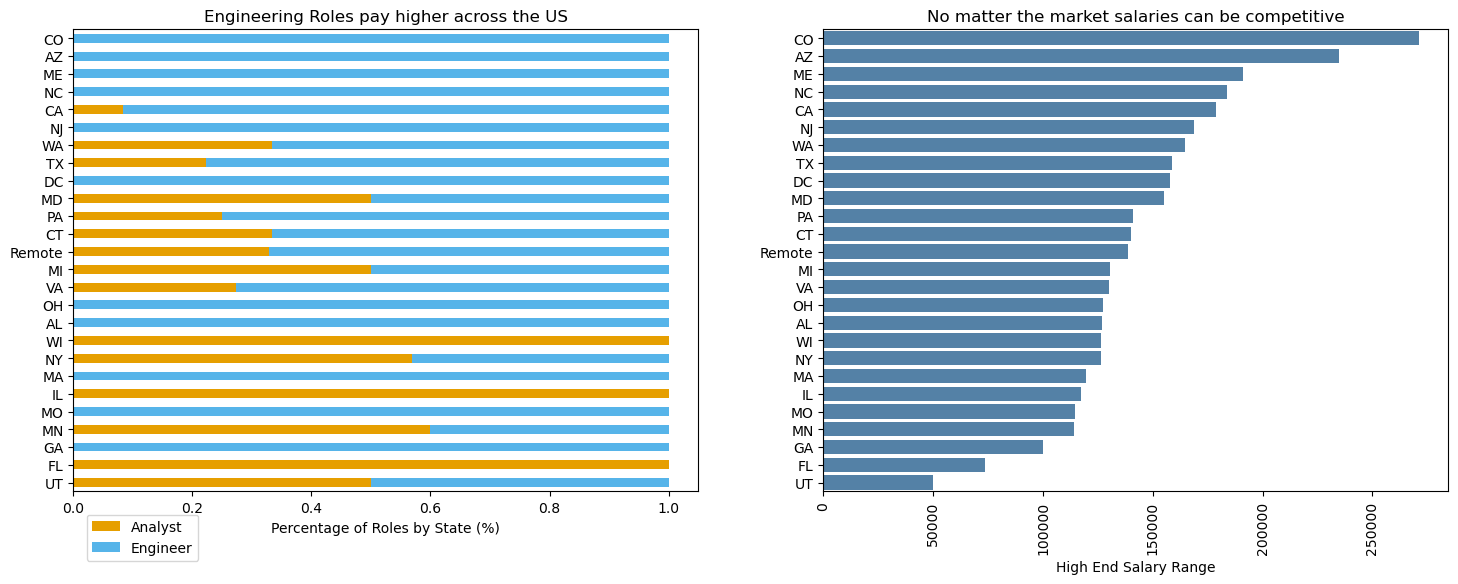

In [200]:
fig, (ax1,ax2) = plt.subplots(1,2)
pivot_df2.sort_values(by='order',ascending=False)[['state','Analyst','Engineer']].plot.barh(x='state',stacked=True,color=['#E69F00','#56B4E9'],ax=ax1)
sns.barplot(data=df_uniq,y='state',x='salary_higher_range',color='steelblue',\
            errorbar = None,order=df_uniq.groupby('state')['salary_higher_range'].mean().sort_values(ascending = False).reset_index().state,ax=ax2)
plt.xticks(rotation=90)
ax1.title.set_text('Engineering Roles pay higher across the US')

ax1.set_ylabel('')
ax1.set_xlabel('Percentage of Roles by State (%)')
ax2.title.set_text('No matter the market salaries can be competitive')
ax2.set_ylabel('')
ax2.set_xlabel('High End Salary Range')
ax1.legend(bbox_to_anchor=(0.2,-0.05),borderaxespad=0)
plt.subplots_adjust(right=1.5)

#fig.tight_layout()
plt.show();